In [365]:
import sys
function_dir = 'C:/Users/angus/Documents/git_repositories/ENGN4350_Honours/subsequence_dtw/'
sys.path.append(function_dir)
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import scipy
import os
import folium 
from PIL import Image
import io
import _functions.visualisation as visualisation

filename_dict ={'sunset1' : 'dvs_vpr_2020-04-21-17-03-03.mat',
                'sunset2' : 'dvs_vpr_2020-04-22-17-24-21.mat',
                'night'   : 'dvs_vpr_2020-04-27-18-13-29.mat',
                'daytime' : 'dvs_vpr_2020-04-24-15-12-03.mat',
                'morning' : 'dvs_vpr_2020-04-28-09-14-11.mat',
                'sunrise' : 'dvs_vpr_2020-04-29-06-20-23.mat'}

gps_file_dict = {'sunset1' : 'sunset1_gps.csv',
                 'sunset2' : 'sunset2_gps.csv',
                 'night'   : 'night_gps.csv',
                 'daytime' : 'daytime_gps.csv',
                 'morning' : 'morning_gps.csv',
                 'sunrise' : 'sunrise_gps.csv'}

video_offset = {'sunset1' : 4.4,
                'sunset2' : -4.4,
                'daytime' : 0,
                'sunrise' : 4.5,
                'morning' : 0,
                'night'   : 1.5}

gps_offset = {'sunset1' : -4.5,
              'sunset2' : 5,
              'daytime' : 2,
              'sunrise' : -4.5,
              'morning' : 2,
              'night'   : 0}


master_mat_dir = 'C:/Users/angus/OneDrive - Australian National University/Honours/Data/Datasets/mat_files/'
mat_dir = 'C:/Users/angus/OneDrive - Australian National University/Honours/Data/Datasets/mat_files/compressed_data/pos_44_neg_-32/'
# gps_dir = 'C:/Users/angus/OneDrive - Australian National University/Honours/Data/Datasets/gps_files/'
gps_dir = 'C:/Users/angus/OneDrive - Australian National University/Honours/Data/Datasets/gps_files/_full_data_interp/'

#---- Load Data ---#
sunset1_full_dataset = loadmat(master_mat_dir+filename_dict['sunset1'])['data']
sunset2_full_dataset = loadmat(master_mat_dir+filename_dict['sunset2'])['data']
night_full_dataset   = loadmat(master_mat_dir+filename_dict['night'])['data']
daytime_full_dataset = loadmat(master_mat_dir+filename_dict['daytime'])['data']
morning_full_dataset = loadmat(master_mat_dir+filename_dict['morning'])['data']

sunset1_dataset = loadmat(mat_dir+filename_dict['sunset1'])['data']
sunset2_dataset = loadmat(mat_dir+filename_dict['sunset2'])['data']
night_dataset   = loadmat(mat_dir+filename_dict['night'])['data']
daytime_dataset = loadmat(mat_dir+filename_dict['daytime'])['data']
morning_dataset = loadmat(mat_dir+filename_dict['morning'])['data']

sunset1_dataset[:,0] -= sunset1_dataset[0,0]
sunset2_dataset[:,0] -= sunset2_dataset[0,0]
night_dataset[:,0] -= night_dataset[0,0]
daytime_dataset[:,0] -= daytime_dataset[0,0]
morning_dataset[:,0] -= morning_dataset[0,0]

# GPS csv header order:
#   latitude(deg), longitude(deg), altitude(m), distance travelled(m), speed(m/s), time of day(HHMMSS), elapsed time(s)  
sunset1_gps = np.genfromtxt(gps_dir+gps_file_dict['sunset1'], delimiter=',')
sunset2_gps = np.genfromtxt(gps_dir+gps_file_dict['sunset2'], delimiter=',')
night_gps = np.genfromtxt(gps_dir+gps_file_dict['night'], delimiter=',')
daytime_gps = np.genfromtxt(gps_dir+gps_file_dict['daytime'], delimiter=',')
morning_gps = np.genfromtxt(gps_dir+gps_file_dict['morning'], delimiter=',')
sunrise_gps = np.genfromtxt(gps_dir+gps_file_dict['sunrise'], delimiter=',')

#### Aligning the GPS Files ####

In [247]:
file_name = 'daytime'
gps_data = daytime_gps

event_time = 34.9
gps_time = 33
# gps_index = np.argmax(gps_data[:,6]>=gps_time)
gps_index = np.argmax(gps_data[:,0]>=gps_time)

# print(gps_data[gps_index,6])

M_event = visualisation.event_visualisation(daytime_full_dataset, event_time, hold_time=0.1)

plot_min = 28
plot_max = 38

show_plot = 0
if show_plot:
    fig, ax = plt.subplots(1,2, figsize=(12,6))
    ax[0].imshow(M_event, cmap='bwr', vmin=-5, vmax=5)
    ax[1].scatter(gps_data[gps_index,2], gps_data[gps_index,1], color='red')
    ax[1].plot(gps_data[plot_min:plot_max,2], gps_data[plot_min:plot_max,1])
    plt.show()


#### Interpolation on the Compressed Data

In [357]:
filename = 'sunset1'

gps_offset = {'sunset1' : 5,
              'sunset2' : -5,
              'daytime' : -2,
              'sunrise' : 4.5,
              'morning' : -2,
              'night'   : 0}

if filename == 'sunset1':
    full_dataset    = sunset1_full_dataset
    dataset         = sunset1_dataset
    gps_data        = sunset1_gps
    data_offset     = gps_offset[filename]

elif filename == 'sunset2':
    full_dataset    = sunset2_full_dataset
    dataset         = sunset2_dataset
    gps_data        = sunset2_gps
    data_offset     = gps_offset[filename]

elif filename == 'night':
    full_dataset    = night_full_dataset
    dataset         = night_dataset
    gps_data        = night_gps
    data_offset     = gps_offset[filename]

elif filename == 'daytime':
    full_dataset    = daytime_full_dataset
    dataset         = daytime_dataset
    gps_data        = daytime_gps
    data_offset     = gps_offset[filename]

elif filename == 'morning':
    full_dataset    = morning_full_dataset
    dataset         = morning_dataset
    gps_data        = morning_gps
    data_offset     = gps_offset[filename]


# if data_offset >= 0:
#     gps_time = np.ceil(data_offset)
#     event_time = gps_time - data_offset
#     print("Positive Offset")
# else:
#     gps_time = 0
#     event_time = abs(data_offset)
#     print("Negative Offset")

# print(f'GPS: {gps_time} \t Event: {event_time}')


#---- Slice the respective data ----#
# events
# event_index = np.argmax(dataset[:,0]>=event_time)
# event_time_data = dataset[event_index:,0]
event_time_data = dataset[:,0]

# gps
# gps_start_index = np.argmax(gps_data[:,0] >= gps_time)
# gps_end_index = np.argmax(gps_data[:,0] >= event_time_data[-1])
# gps_interp_data = gps_data[gps_start_index:gps_end_index+1,:]
gps_interp_data = gps_data
gps_interp_data[:,0] - data_offset


#----- Interpolation ----#
interpolated_latitude = np.interp(event_time_data, gps_interp_data[:, 6], gps_interp_data[:, 0])
interpolated_longitude = np.interp(event_time_data, gps_interp_data[:, 6], gps_interp_data[:, 1])

interp_position = np.zeros((len(event_time_data),3))
interp_position[:,0] = event_time_data
interp_position[:,1] = interpolated_latitude
interp_position[:,2] = interpolated_longitude

save_dir = 'C:/Users/angus/OneDrive - Australian National University/Honours/Data/Datasets/gps_files/_compression_interpolation/v4/'
if not os.path.exists(save_dir):
    os.mkdir(save_dir)
np.savetxt(save_dir + gps_file_dict[filename], interp_position, delimiter=',')


# # show_plot = 0
# # if show_plot:
# #     plt.plot(interpolated_longitude, interpolated_latitude)
# #     plt.plot(gps_data[gps_start_index:gps_end_index,2], gps_data[gps_start_index:gps_end_index, 1], 'red')

#### Check the Interpolated GPS data


In [319]:
gps_interp_dir = 'C:/Users/angus/OneDrive - Australian National University/Honours/Data/Datasets/gps_files/_compression_interpolation/v2/'

gps_file_dict = {'sunset1' : 'sunset1_gps.csv',
                    'sunset2' : 'sunset2_gps.csv',
                    'daytime' : 'daytime_gps.csv',
                    'morning' : 'morning_gps.csv',
                    'night'   : 'night_gps.csv'}

sunset1_gps_interp = np.genfromtxt(gps_interp_dir+gps_file_dict['sunset1'], delimiter=',')
sunset2_gps_interp = np.genfromtxt(gps_interp_dir+gps_file_dict['sunset2'], delimiter=',')
night_gps_interp   = np.genfromtxt(gps_interp_dir+gps_file_dict['night'], delimiter=',')
daytime_gps_interp = np.genfromtxt(gps_interp_dir+gps_file_dict['daytime'], delimiter=',')
morning_gps_interp = np.genfromtxt(gps_interp_dir+gps_file_dict['morning'], delimiter=',')

time = 30

show_plot = 0 
if show_plot:
    fig, ax = plt.subplots()
    ax.plot(sunset1_gps_interp[:,2], sunset1_gps_interp[:,1], label='sunset1_interp')
    ax.plot(sunset1_gps[:,2], sunset1_gps[:,1], label='sunset1')
    # ax.plot(sunset2_gps_interp[:,2], sunset2_gps_interp[:,1], label='sunset2_interp')
    # ax.plot(sunset2_gps[:,2], sunset2_gps[:,1], label='sunset2')
    ax.legend()

[ 15.50255609 -27.50689705 152.91257535]


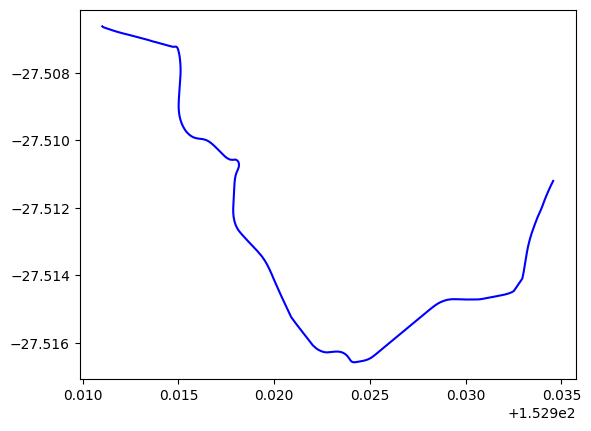

In [343]:
#---- Select Point ----#
sunset1_offset = 5

sunset1_test = sunset1_dataset
sunset1_gps_test = np.zeros((sunset1_gps.shape[0],3))
sunset1_gps_test[:,0:2] = sunset1_gps[:,0:2]
sunset1_gps_test[:,2] = sunset1_gps[:,6] - sunset1_offset


# Interpolate latitude values
interpolated_latitude = np.interp(sunset1_test[:,0], sunset1_gps_test[:, 2], sunset1_gps_test[:, 0])
interpolated_longitude = np.interp(sunset1_test[:,0], sunset1_gps_test[:, 2], sunset1_gps_test[:, 1])

sunset1_interp_position = np.zeros((sunset1_test.shape[0],3))
sunset1_interp_position[:,0] = sunset1_test[:,0]
sunset1_interp_position[:,1] = interpolated_latitude
sunset1_interp_position[:,2] = interpolated_longitude

# sunset1_test = sunset1_dataset
# sunset1_gps_test = np.zeros((sunset1_gps.shape[0],3))
# sunset1_gps_test[:,0:2] = sunset1_gps[:,0:2]
# sunset1_gps_test[:,2] = sunset1_gps[:,6] - sunset1_offset

# # Interpolate latitude values
# interpolated_latitude = np.interp(sunset1_test[:,0], sunset1_gps_test[:, 2], sunset1_gps_test[:, 0])
# interpolated_longitude = np.interp(sunset1_test[:,0], sunset1_gps_test[:, 2], sunset1_gps_test[:, 1])

# sunset1_interp_position = np.zeros((sunset1_test.shape[0],3))
# sunset1_interp_position[:,0] = sunset1_test[:,0]
# sunset1_interp_position[:,1] = interpolated_latitude
# sunset1_interp_position[:,2] = interpolated_longitude


# save_dir = 'C:/Users/angus/OneDrive - Australian National University/Honours/Data/Datasets/gps_files/_compression_interpolation/'
# save_dir = 'C:/Users/angus/OneDrive - Australian National University/Honours/Data/Datasets/gps_files/_full_data_interp/'
# # np.savetxt(save_dir + gps_file_dict[sunset1_name], sunset1_interp_position, delimiter=',')
# slice_index = np.argmax(sunset1_interp_position[:,0]>40)

# # print(f'Index: {slice_index} {sunset1_interp_position[slice_index,0]}')

# idx = 120000

t = 15.5

index = np.argmax(sunset1_interp_position[:,0]>=t)
print(sunset1_interp_position[index,:])

plt.plot(sunset1_interp_position[:,2], sunset1_interp_position[:,1], 'blue', linewidth=1.5)
# plt.scatter(sunset1_interp_position[:,2], sunset1_interp_position[:,1])

# plt.scatter(sunset1_interp_position[slice_index,2], sunset1_interp_position[slice_index,1])

In [148]:
#---- Mapping ----#
path = sunset1_gps[:,0:2]
path_interp = sunset1_interp_position[:,1:3]
index = 85


map_lat = sunset1_gps[:,0]
map_lon = sunset2_gps[:,1]
min_lat = min(map_lat)
max_lat = max(map_lat)
median_lat = np.median(map_lat)
min_lon = min(map_lon)
max_lon = max(map_lon)
median_lon = np.median(map_lon)

m = folium.Map(min_zoom=15, max_bounds=True, location=[median_lat, median_lat], zoom_start=15, min_lat=min_lat, max_lat=max_lat, min_lon=min_lon, max_lon=max_lon)

# sunset2_marker = folium.CircleMarker(location=[sunset2_gps[index,0], sunset2_gps[index,1]], radius=5, color='red', fill=True, fill_color='red',fill_opacity=1)
# sunset2_marker_label = folium.Popup('Start/End', parse_html=True)

sunset1_marker = folium.CircleMarker(location=[sunset1_gps[index,0], sunset1_gps[index,1]], radius=5, color='red', fill=True, fill_color='red',fill_opacity=1)
sunset1_marker_label = folium.Popup('Start/End', parse_html=True)

path_map = folium.PolyLine(locations=path, color='black', weight=3)
interp_path_map = folium.PolyLine(locations=path_interp, color='red', weight=3)

path_map.add_to(m)
interp_path_map.add_to(m)
sunset1_marker.add_to(m)
sunset1_marker.add_child(sunset1_marker_label)
m

In [371]:
run = 1
if run:
    #---- Select Point ----#
    filename = 'sunrise'

    if filename == 'sunset1':
        gps_data = sunset1_gps
    elif filename == 'sunset2':
        gps_data = sunset2_gps
    elif filename == 'night':
        gps_data = night_gps
    elif filename == 'daytime':
        gps_data = daytime_gps
    elif filename == 'morning':
        gps_data = morning_gps
    elif filename == 'sunrise':
        gps_data = sunrise_gps

    # time_array = np.arange(1,gps_data[-1,6])
    time_array = np.arange(1,gps_data[-1,5])

    # Interpolate latitude values
    interpolated_latitude = np.interp(time_array, gps_data[:, 5], gps_data[:, 0])
    interpolated_longitude = np.interp(time_array, gps_data[:, 5], gps_data[:, 1])

    interp_position = np.zeros((len(time_array),3))
    interp_position[:,0] = time_array
    interp_position[:,1] = interpolated_latitude
    interp_position[:,2] = interpolated_longitude
    # save_dir = 'C:/Users/angus/OneDrive - Australian National University/Honours/Data/Datasets/gps_files/_compression_interpolation/'
    save_dir = 'C:/Users/angus/OneDrive - Australian National University/Honours/Data/Datasets/gps_files/_full_data_interp/'
    np.savetxt(save_dir + gps_file_dict[filename], interp_position, delimiter=',')

